# numpyの基礎
今回はnumpyの基礎について説明する。numpyは配列を数学的に扱うことができるライブラリである。数学でいうベクトルや行列の計算用のライブラリである。ここでは数学の詳細には触れず、numpyにおける配列の扱い方について学ぶ。

## numpyのインポート
numpyをインポートする際は、慣習上npとリネームして用いる。

In [1]:
import numpy as np

## numpyでの配列の宣言
numpyの配列の宣言はnp.array([配列])で行う。

In [2]:
a = np.array([1,2,3])
b = np.array([x for x in range(10)])
print(a)
print(b)

[1 2 3]
[0 1 2 3 4 5 6 7 8 9]


## 多次元配列の宣言
numpyの多次元配列は同様に宣言することができる。

In [3]:
a = np.array([[0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5]])
print(a)

[[0 1 2 3 4 5]
 [0 1 2 3 4 5]]


## 型変換
numpyはdtypeで指定できる。宣言時に型を指定できる。既存の配列の型変換についてはastypeで変更できる。また、numpyはlistと異なり、全て同じ変数型でないとならない。

In [4]:
lst = [[0, 1, 2, 3, 4, 5], [0, 2, 4, 6, 8, 10]]
a = np.array(lst, dtype=float)
print(a)
print(a.astype(int))
print(a.astype(str))

[[ 0.  1.  2.  3.  4.  5.]
 [ 0.  2.  4.  6.  8. 10.]]
[[ 0  1  2  3  4  5]
 [ 0  2  4  6  8 10]]
[['0.0' '1.0' '2.0' '3.0' '4.0' '5.0']
 ['0.0' '2.0' '4.0' '6.0' '8.0' '10.0']]


# numpyの配列型の変換
numpyはshapeを用いて配列の形を確認できる。

In [5]:
lst = [[j*(i+1) for j in range(6)] for i in range(2)]
a = np.array(lst)
print(a)
print(a.shape)

[[ 0  1  2  3  4  5]
 [ 0  2  4  6  8 10]]
(2, 6)


上の配列を見ると2行で6列の配列になっていることがわかる。数学的には行列と呼ばれる構造である(行列については別の章で扱う)。reshapeを用いると、この配列の形を変えることができる。

In [6]:
lst = [[j*(i+1) for j in range(6)] for i in range(2)]
a = np.array(lst)
a_2 = a.reshape(4,3)
print(a)
print(a.shape)
print(a_2)
print(a_2.shape)

[[ 0  1  2  3  4  5]
 [ 0  2  4  6  8 10]]
(2, 6)
[[ 0  1  2]
 [ 3  4  5]
 [ 0  2  4]
 [ 6  8 10]]
(4, 3)


この例では、4行3列の配列に変更することができた。このreshapeは、変更前と変更後で合計の要素の数が等しくなる必要がある。行と列を入れ替えたいだけの場合はTを用いる。

In [7]:
lst = [[j*(i+1) for j in range(6)] for i in range(2)]
a = np.array(lst)
print(a)
print(a.T)

[[ 0  1  2  3  4  5]
 [ 0  2  4  6  8 10]]
[[ 0  0]
 [ 1  2]
 [ 2  4]
 [ 3  6]
 [ 4  8]
 [ 5 10]]


# numpyの計算
numpyは四則計算ができる。同じ形の配列のnumpy同士では、同じ位置にある要素同士を四則演算する。

In [8]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[2, 4, 6], [1, 1, 1]])
print(a)
print(b)
print()
print(a+b)
print(a-b)
print(a*b)
print(b/a)
print(a**b)

[[1 2 3]
 [4 5 6]]
[[2 4 6]
 [1 1 1]]

[[3 6 9]
 [5 6 7]]
[[-1 -2 -3]
 [ 3  4  5]]
[[ 2  8 18]
 [ 4  5  6]]
[[2.         2.         2.        ]
 [0.25       0.2        0.16666667]]
[[  1  16 729]
 [  4   5   6]]


## numpyのブロードキャスト
numpyは配列の形が異なる配列を演算した時、要素の数が少ない方を自動で要素を拡大して計算することである。以下に例を示す。

In [9]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = 3
print(a*b)

[[ 3  6  9]
 [12 15 18]]


この例の場合、bを全て3の$\left(2\times3 \right)$の配列とみなして計算している。

[[1, 2, 3], [4, 5, 6]] * 3 = [[1, 2, 3], [4, 5, 6]] * [[3, 3, 3], [3, 3, 3]]  
のようなイメージである。

もう一つ例を示す。

In [10]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([1, -1, 2])
print(a.shape)
print(b.shape)
print(a*b)

(3, 3)
(3,)
[[ 1 -2  6]
 [ 4 -5 12]
 [ 7 -8 18]]


今度は、bが持っている一つの配列[1, -1, 2]を3つ複製して$\left(3\times3 \right)$の配列とみなして計算している。

[[1, 2, 3], [4, 5, 6], [7, 8, 9]] * [1, -1, 2] = [[1, 2, 3], [4, 5, 6], [7, 8, 9]] * [[1, -1, 2], [1, -1, 2], [1, -1, 2]]  
のような計算である。

# numpyの関数
numpyには様々な関数が実装されている。ここでは全ては紹介できないが、代表的な関数を取り上げ、挙動を見ていく。

## 累乗
np.powerで累乗を行うことができる。

In [11]:
np.power(2, 3)

8

これは$2^{3}$をした例であるが、ここにnumpyの配列を入れると、配列全てを累乗する。

In [12]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(np.power(a, 3))

[[  1   8  27]
 [ 64 125 216]
 [343 512 729]]


## 平均
numpyの平均は、np.meanで行うことがきる

In [13]:
a = np.array([1, 2, 3])
print(np.mean(a))

2.0


要素ごとの平均を取っていることがわかる。ここで多次元のnumpyに平均を取ると以下のようになる。

In [14]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(np.mean(a))

5.0


同様に全ての要素の平均を取っていることがわかる。ここで、axis(軸)という概念を紹介する。

In [15]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(a)
print(np.mean(a, axis=0))
print(np.mean(a, axis=1))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[4. 5. 6.]
[2. 5. 8.]


axis=0とした場合は、縦方向に平均を取っている

$$
\left[
\left[1, 2, 3 \right], \\
\left[4, 5, 6 \right], \\
\left[7, 8, 9 \right] 
\right] \\
= \left[ \frac{1+4+7}{3}, \frac{2+5+8}{3}, \frac{3+6+8}{3} \right] = \left[4, 5, 6 \right]
$$

axis=1とした場合は、横方向に平均を取っている

$$
\left[
\left[1, 2, 3 \right], \\
\left[4, 5, 6 \right], \\
\left[7, 8, 9 \right] 
\right] \\
= \left[ \frac{1+2+3}{3}, \frac{4+5+6}{3}, \frac{7+8+9}{3} \right] = \left[2, 5, 8 \right]
$$

# Pandasの基礎
今回はPandasについて解説する。PandasはcsvやExcelファイルなど、表形式のデータ型を扱うのに便利なライブラリである。numpy同様非常に高機能なため全てを解説することはできないが、基礎的な考え方についてここでは学ぶ。次のような配列を考えてみる。

In [16]:
lst = [['坂本勇人',  186, 85, '右投右打', '内野手'],\
       ['丸佳浩', 177, 94, '右投左打', '外野手'], \
       ['小林誠司', 178, 86, '右投右打', '捕手'], \
       ['菅野智之', 186, 92, '右投右打', '投手']]

これをpandas型で表現してみる。まず、pandasをインポートする。pandasは慣習上pdとリネームする。

In [17]:
import pandas as pd

pandasの宣言はDataFrameを用いて以下のように行う。

In [18]:
df = pd.DataFrame(lst)
print(df)

      0    1   2     3    4
0  坂本勇人  186  85  右投右打  内野手
1   丸佳浩  177  94  右投左打  外野手
2  小林誠司  178  86  右投右打   捕手
3  菅野智之  186  92  右投右打   投手


Jupyterではprintの代わりにdisplayを用いると表形式で表示される。

In [19]:
display(df)

,0,1,2,3,4
0,坂本勇人,186,85,右投右打,内野手
1,丸佳浩,177,94,右投左打,外野手
2,小林誠司,178,86,右投右打,捕手
3,菅野智之,186,92,右投右打,投手


pandasでは行(index)、列(column)の名称が存在する。デフォルトでは上で見るように0,1,2,...という形式となっている。宣言時に行、列を表現することも可能。

In [20]:
df = pd.DataFrame(lst, columns=['選手名', '身長', '体重', '投打', 'ポジション'], index=[6, 8, 22, 18])
display(df)

,選手名,身長,体重,投打,ポジション
6,坂本勇人,186,85,右投右打,内野手
8,丸佳浩,177,94,右投左打,外野手
22,小林誠司,178,86,右投右打,捕手
18,菅野智之,186,92,右投右打,投手


カラムの名称変更にはrenameを用いる。rename(columns={変更前のカラム名:変更後のカラム名,...})のように変更したいカラム名を辞書形式で指定する。

In [21]:
df = df.rename(columns={'選手名':'player', '身長':'height', '体重':'weight'})
display(df)

,player,height,weight,投打,ポジション
6,坂本勇人,186,85,右投右打,内野手
8,丸佳浩,177,94,右投左打,外野手
22,小林誠司,178,86,右投右打,捕手
18,菅野智之,186,92,右投右打,投手


インデックスの変更も同様にrename(index={変更前のインデックス名:変更後のインデックス名,...})のように指定すればよい。

In [22]:
df = df.rename(index={6:'坂本', 8:'丸', 22:'小林', 18:'菅野'})
display(df)

,player,height,weight,投打,ポジション
坂本,坂本勇人,186,85,右投右打,内野手
丸,丸佳浩,177,94,右投左打,外野手
小林,小林誠司,178,86,右投右打,捕手
菅野,菅野智之,186,92,右投右打,投手


# pandasのデータ切り取り
pandasでは特定の列のみを抽出したい場合にはdf[[取り出したいカラムをリストで指定]]で取得できる。また、リストを追加したい場合は、df['追加したいカラム名'] = [追加したいリスト]で追加すれば良い。
なお、df['既存のカラム名'] = []とすると既存のカラムが上書きされる

In [23]:
# データ初期化

df = pd.DataFrame(lst, columns=['選手名', '身長', '体重', '投打', 'ポジション'], index=[6, 8, 22, 18])
display(df[['選手名', '投打', 'ポジション']])
df['出身地'] = ['兵庫', '千葉', '大阪', '神奈川']
display(df)

#全てのデータが書き換わる
df['投打'] = '左投左打'
display(df)
#リスト指定も可能
df['投打'] = ['右投右打', '右投左打', '右投右打', '右投右打']
display(df)

,選手名,投打,ポジション
6,坂本勇人,右投右打,内野手
8,丸佳浩,右投左打,外野手
22,小林誠司,右投右打,捕手
18,菅野智之,右投右打,投手


,選手名,身長,体重,投打,ポジション,出身地
6,坂本勇人,186,85,右投右打,内野手,兵庫
8,丸佳浩,177,94,右投左打,外野手,千葉
22,小林誠司,178,86,右投右打,捕手,大阪
18,菅野智之,186,92,右投右打,投手,神奈川


,選手名,身長,体重,投打,ポジション,出身地
6,坂本勇人,186,85,左投左打,内野手,兵庫
8,丸佳浩,177,94,左投左打,外野手,千葉
22,小林誠司,178,86,左投左打,捕手,大阪
18,菅野智之,186,92,左投左打,投手,神奈川


,選手名,身長,体重,投打,ポジション,出身地
6,坂本勇人,186,85,右投右打,内野手,兵庫
8,丸佳浩,177,94,右投左打,外野手,千葉
22,小林誠司,178,86,右投右打,捕手,大阪
18,菅野智之,186,92,右投右打,投手,神奈川


# Pandasのデータ抽出
pandasのデータ抽出にはいくつかやり方があるが、今回は以下の書き方を紹介する。

df[df[カラム名] 条件]

のように書けば良い。例を見て欲しい

In [24]:
# 内野手を抽出する例
display(df[df['ポジション'] == '内野手'])

# 右投げ左打ち以外を抽出する例
display(df[df['投打'] != '右投左打'])

,選手名,身長,体重,投打,ポジション,出身地
6,坂本勇人,186,85,右投右打,内野手,兵庫


,選手名,身長,体重,投打,ポジション,出身地
6,坂本勇人,186,85,右投右打,内野手,兵庫
22,小林誠司,178,86,右投右打,捕手,大阪
18,菅野智之,186,92,右投右打,投手,神奈川


and条件、or条件も使えるがand, orではなく&, |を使うことに注意。

In [25]:
# 右投右打かつ身長180cm以上を抽出
display(df[(df['投打'] == '右投右打') & (df['身長'] >= 180)])
# 右投右打かつ身長180cm以上を抽出
display(df[(df['投打'] == '右投右打') | (df['身長'] >= 180)])

,選手名,身長,体重,投打,ポジション,出身地
6,坂本勇人,186,85,右投右打,内野手,兵庫
18,菅野智之,186,92,右投右打,投手,神奈川


,選手名,身長,体重,投打,ポジション,出身地
6,坂本勇人,186,85,右投右打,内野手,兵庫
22,小林誠司,178,86,右投右打,捕手,大阪
18,菅野智之,186,92,右投右打,投手,神奈川


# Pandasのデータ保存と呼び出し
pandasではcsvやExcelで保存したり、csvを呼び出すことができる。

## Pandasのデータ保存
### csv
pandasをcsvファイルで保管したい場合はto_csvを用いる。

In [26]:
df.to_csv('./data/baseball_player_index.csv')
# 特定の列だけ保管したい場合
df.to_csv('./data/baseball_player_columns.csv', columns=['選手名', 'ポジション'])
# headerなし、カラムなしの場合(デフォルトはTrue。片方のみの指定も可)
df.to_csv('./data/baseball_player_nohi.csv', header=False, index=False)
# インデックスのみなし
df.to_csv('./data/baseball_player.csv', index=False)
# 区切りを変更する場合(タブ区切り)
df.to_csv('./data/baseball_player_tab.csv', index=False, sep='\t')

In [27]:
# 追記したい場合
df.to_csv('./data/baseball_player_tab.csv', index=False, sep='\t', mode='a')

### Excel
Excelファイルの保管はto_excelで行う。to_csvと同じような使い方ができるが、Excelはsheetがあるので、sheet_nameがある点が異なる。

In [28]:
df.to_excel('./data/baseball_player.xlsx', \
          header=False, \
          index=False, \
          sheet_name = 'baseball_player')

複数のシートに書き込みしたい場合や追記したい場合はopenpyxlが環境によっては必要。下記プログラムがエラーになる場合はインストールする。  
% conda install openpyxl

In [29]:
df_name = df['選手名']
with pd.ExcelWriter('./data/baseball_player_multi.xlsx') as writer:
    df.to_excel(writer, sheet_name = 'baseball_player', index=False)
    df_name.to_excel(writer, sheet_name = 'player_name', index=False)

## csvまたはExcelファイルの読み込み
### csv
csvファイルの読み込みはread_csvを用いる。  
デフォルトでは1行目がheaderインデックスは行数(0始まりとなる)

In [30]:
df_baseball = pd.read_csv('./data/baseball_player.csv')
display(df_baseball)

,選手名,身長,体重,投打,ポジション,出身地
0,坂本勇人,186,85,右投右打,内野手,兵庫
1,丸佳浩,177,94,右投左打,外野手,千葉
2,小林誠司,178,86,右投右打,捕手,大阪
3,菅野智之,186,92,右投右打,投手,神奈川


In [31]:
# headerがない場合
df_baseball = pd.read_csv('./data/baseball_player.csv', header=None)
display(df_baseball)
# indexを指定する場合
df_baseball = pd.read_csv('./data/baseball_player.csv', index_col=0)
display(df_baseball)

,0,1,2,3,4,5
0,選手名,身長,体重,投打,ポジション,出身地
1,坂本勇人,186,85,右投右打,内野手,兵庫
2,丸佳浩,177,94,右投左打,外野手,千葉
3,小林誠司,178,86,右投右打,捕手,大阪
4,菅野智之,186,92,右投右打,投手,神奈川


,身長,体重,投打,ポジション,出身地
選手名,,,,,
坂本勇人,186,85,右投右打,内野手,兵庫
丸佳浩,177,94,右投左打,外野手,千葉
小林誠司,178,86,右投右打,捕手,大阪
菅野智之,186,92,右投右打,投手,神奈川


### Excel
Excelの場合もread_excelで開くことができ、csvとほぼ同様ではあるが別途シート名を指定するがある。

In [32]:
df_baseball = pd.read_excel('./data/baseball_player_multi.xlsx', sheet_name='baseball_player')
display(df_baseball)

,選手名,身長,体重,投打,ポジション,出身地
0,坂本勇人,186,85,右投右打,内野手,兵庫
1,丸佳浩,177,94,右投左打,外野手,千葉
2,小林誠司,178,86,右投右打,捕手,大阪
3,菅野智之,186,92,右投右打,投手,神奈川


# matplotlibの基礎
matplotlibはグラフ描画のモジュールである。今回はmatplotlibを用いたグラフ描画の方法を確認する。
## matplotlibのインポート
今回はmatplotlib.pyplotをインポートする。慣習上pltとリネームして用いる。  
セルに%matplotlib inlineを記述しておけば、グラフが自動で描画できるので記載しておく。環境によってはセルごとに記載が必要な場合があるので、もし今後グラフが描画されない場合は各自記載していただきたい。

In [33]:
# 今回はnumpyも用いるのでimportしている
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## グラフの描画
グラフの描画の例として二次関数を描画してみる。グラフの書き方はいくつがあるが、subplotsを用いた書き方を説明する。  
今回は
$$
y = x^{2}
$$
を描く。
### np.linespace
numpy linespaceは等間隔の数値の配列を作成する。  
&nbsp; np.linespace(開始値,終了値,点の数)  
のように記載する。

In [34]:
x = np.linspace(-3, 3, 100)
print(x)
print(len(x))

# xの値をもとにyの値をつくる
y = np.power(x, 2)
print(y)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

## グラフを作成する
グラフはplt.subplotsを用いて作成する。以下のように行う。

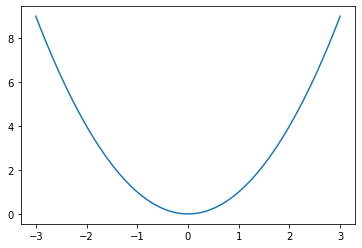

In [35]:
fig, axe = plt.subplots()
axe.plot(x, y)

##  グラフを整形する
グラフを実際に整形してみる。  
### 1. グラフの範囲を変更する
グラフのx軸とy軸の範囲を変更するには、set_xlim, set_ylimを用いる。範囲は配列で指定する

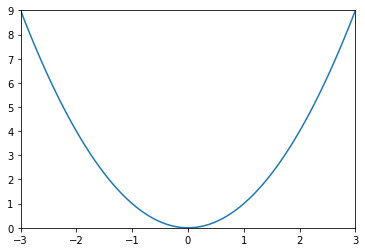

In [36]:
fig, axe = plt.subplots()
axe.set_xlim([-3, 3])
axe.set_ylim([0, 9])
axe.plot(x, y)

### 2.グラフにタイトルをつける
グラフにタイトルをつけるには、set_titleを用いる。

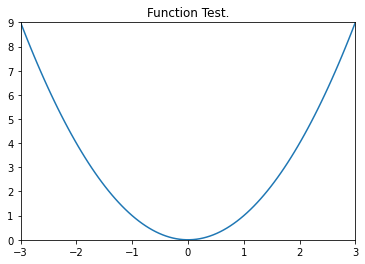

In [37]:
fig, axe = plt.subplots()
axe.set_xlim([-3, 3])
axe.set_ylim([0, 9])
axe.set_title('Function Test.')
axe.plot(x, y)

### 3.軸にラベルをつける
軸にラベルをつけるには、set_xlabel、set_ylabelのようにつける。

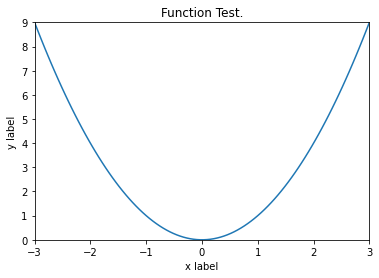

In [38]:
fig, axe = plt.subplots()
axe.set_xlim([-3, 3])
axe.set_ylim([0, 9])
axe.set_title('Function Test.')
axe.set_xlabel('x label')
axe.set_ylabel('y label')
axe.plot(x, y)

### 4.グラフに目盛り線を入れる
グラフに目盛りを入れるにはgridを用いる。

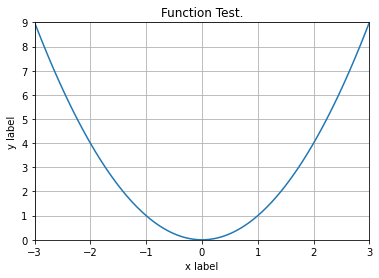

In [39]:
fig, axe = plt.subplots()
axe.set_xlim([-3, 3])
axe.set_ylim([0, 9])
axe.set_title('Function Test.')
axe.set_xlabel('x label')
axe.set_ylabel('y label')
axe.grid()
axe.plot(x, y)

### 5. グラフに凡例をつける。色を変えるスタイルを変える
グラフの凡例をつけるにはまず、plotのオプションでlabelをつける。さらにplotの後にlegendを実行する必要がある。  
次に色はplotのcolorオプションで色をつけることができる。指定可能な色については下記サイトを参照。  
https://matplotlib.org/examples/color/named_colors.html  
また、線のスタイルの設定はlinestyleオプションで指定可能。下記を参照のこと。  
https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html  
https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html

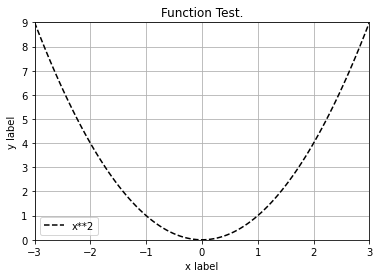

In [40]:
fig, axe = plt.subplots()
axe.set_xlim([-3, 3])
axe.set_ylim([0, 9])
axe.set_title('Function Test.')
axe.set_xlabel('x label')
axe.set_ylabel('y label')
axe.grid()
axe.plot(x, y, label='x**2', color='black', linestyle='dashed')
axe.legend()

### 6.グラフのサイズを変更する
グラフのサイズを変更する場合はsubplotsの宣言時にfigsizeのオプションで変更できる。

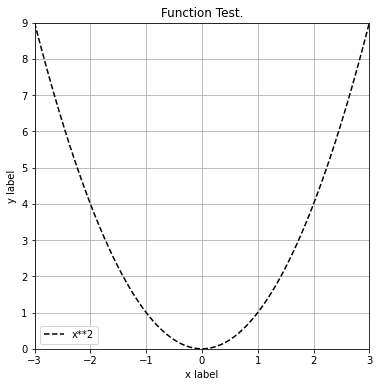

In [41]:
fig, axe = plt.subplots(figsize=(6, 6))
axe.set_xlim([-3, 3])
axe.set_ylim([0, 9])
axe.set_title('Function Test.')
axe.set_xlabel('x label')
axe.set_ylabel('y label')
axe.grid()
axe.plot(x, y, label='x**2', color='black', linestyle='dashed')
axe.legend()

## 一つのシートに複数のグラフを並べる
一つのシートにグラフを並べて描くことも可能である。  
追加したいグラフを追加でプロットすれば良い。今回は
$$
y = \frac{1}{2}x^{2} + 2
$$
をプロットしてみる。

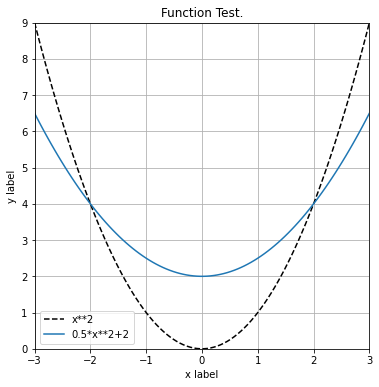

In [42]:
fig, axe = plt.subplots(figsize=(6, 6))
axe.set_xlim([-3, 3])
axe.set_ylim([0, 9])
axe.set_title('Function Test.')
axe.set_xlabel('x label')
axe.set_ylabel('y label')
axe.grid()
axe.plot(x, y, label='x**2', color='black', linestyle='dashed')
## 追加するグラフ ##
y2 = 0.5 * x **2 + 2
axe.plot(x, y2, label='0.5*x**2+2')
axe.legend()